In [1]:
import os

download_name = "wiki.train.tokens.bz2"
if not os.path.exists(download_name):
    import requests
    response = requests.get(f"https://raw.githubusercontent.com/bzitko/nlp_repo/main/assignments/a01/{download_name}")
    with open(download_name, "wb") as fp:
        fp.write(response.content)
    response.close()
        
name = "wiki.train.tokens"
if not os.path.exists(name):
    import bz2
    with open(download_name, 'rb') as bzf, open(name, 'wb') as fp:
        fp.write(bz2.decompress(bzf.read()))    

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Read data

Filename "wiki.train.tokens" contains token-prepared text from Wikipedia. Store each line of file content into the list.

In [3]:
with open('wiki.train.tokens', encoding="utf8") as fp:
    wikitext = fp.readlines()

In [4]:
wikitext[1234]

' A common comment on the novel is the graphic nature of the many acts of torture and murder which are depicted in the novel . Vargas lets the reader see the <unk> of an oppressive regime with a degree of detail not often used by his <unk> in Latin American literature , as Michael Wood suggests in the London Review of Books : " Vargas Llosa ... tells us far more about the details of day @-@ to @-@ day intrigue , and the <unk> , sadistic <unk> of torture and murder . " Walter Kirn of the New York Times suggests that the " <unk> scenes of dungeon <unk> and torture sessions " cast other aspects of the novel in a pale light , draining them of their significance and impact . Similarly , Kirn implies that the " narrative machinery " mentioned by Wood as being somewhat unwieldy also produces a largely superfluous storyline . The plot line centered on Urania Cabral is described by <unk> as being an emotional centre that focuses the novel , and Wood agrees that her confrontations with past demo

# 2. Tokenization

Create function *tokenize* which: 
* for a given lines of string 
* returns list of tokens

In [5]:
def tokenize(lines):
    for line in lines:
        for token in line.rstrip().split():
            yield token 

# 3. Heaps' law

Empirical law.

* $N$ = numbers of tokens
* $V$ = vocabulaty size

$V = k N^{\beta}$ where:
* $k$ is between 10 and 100
* $\beta$ is between 0.4 and 0.6

First determine and print $N$ and $V$, then for each $k$ between 10 and 100 print $k$ and corresponding $\beta$.


In [6]:
N = sum(1 for t in tokenize(wikitext))
V = len(set(tokenize(wikitext)))


print(f"N={N}, V = {V}\n")

import math

for k in range(10, 100, 10):
    beta = (math.log(V) - math.log(k)) / math.log(N)
    print(f"k={k}, beta = {beta:.3f}")

N=2051910, V = 33277

k=10, beta = 0.558
k=20, beta = 0.510
k=30, beta = 0.482
k=40, beta = 0.463
k=50, beta = 0.447
k=60, beta = 0.435
k=70, beta = 0.424
k=80, beta = 0.415
k=90, beta = 0.407


# 3. Word-to-index mapping

Create two dictionaries:
* w2i - that maps word to index and (index can be cummulative determined by the size of current dictionary)
* i2w - that maps index to word

In [7]:
w2i = {}
for token in tokenize(wikitext):
    if token not in w2i:
        w2i[token] = len(w2i) 
        
        
i2w = {i: w for w, i in w2i.items()}

assert i2w[w2i["language"]] == "language"

# 4. Word counter


`Counter` class from `collections` module can be used  for counting frequencies of words
`from collections import Counter`

In [8]:
from collections import Counter

counter = Counter(tokenize(wikitext)) 

In [9]:
counter.most_common(10)

[('the', 113161),
 (',', 99913),
 ('.', 73388),
 ('of', 56889),
 ('<unk>', 54625),
 ('and', 50603),
 ('in', 39453),
 ('to', 39190),
 ('a', 34237),
 ('=', 29570)]

Make plot where:
* x axis represents words sorted by their frequency
* y axis are word frequencies (in log scale)

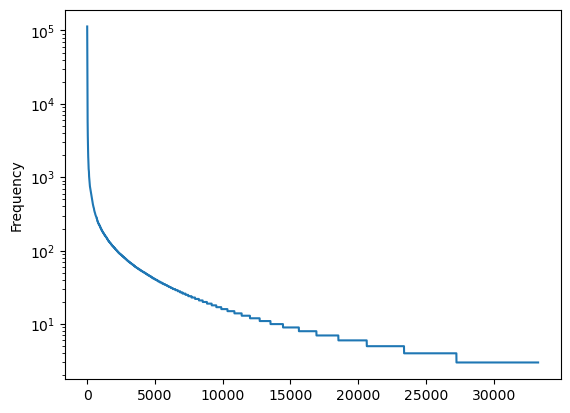

In [10]:
freqs = sorted(counter.values(), reverse=True)
plt.yscale("log")
plt.ylabel("Frequency")
plt.plot(range(len(freqs)), freqs)
plt.show()


# 5. Zipf's law

Empirical law:
* r - rank of the word
* f - frequency of the word

$f \propto \frac{1}{r}$ 

Make plot where:
* x axis represents words sorted by frequencies (use log scale for this axis) and
* y axis are frequencies (use log scale for this axis)

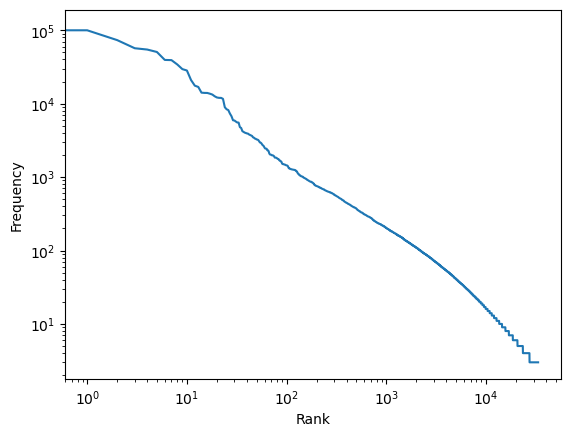

In [11]:
words, counts = zip(*counter.most_common())

plt.xscale('log')
plt.xlabel('Rank')
plt.yscale('log')
plt.ylabel('Frequency')
plt.plot(range(len(words)), counts)
plt.show() 